In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
tips = sns.load_dataset("tips")

In [5]:
tips.tail() # 244 tane veri var

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## Dis Plot
Bir FacetGrid üzerine dağıtım grafikleri çizmek için şekil düzeyinde arayüz.
Bu işlev, semantik haritalama ve birden çok alt grafik arasında yüzey oluşturma ile tanımlanan veri alt kümeleri dahil olmak üzere, verilerin tek değişkenli veya iki değişkenli dağılımını görselleştirmek için çeşitli yaklaşımlara erişim sağlar. 

* kindParametre kullanımına bir yaklaşım seçer:

    * histplot()(ile kind="hist"; varsayılan)

    * kdeplot()(ile kind="kde")

    * ecdfplot()(ile kind="ecdf"; yalnızca tek değişkenli)

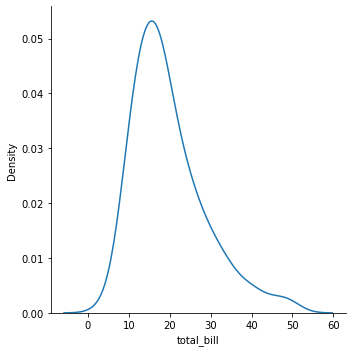

In [6]:
sns.displot(tips["total_bill"], kind="kde")

## Joint Plot
**jointplot()**, temelde **iki değişkenli veriler** için iki dağılımı eşleştirmenizi sağlar. Hangi ikisini karşılaştırılacağınızı kind parametresiyle seçilir:
* kind : { "scatter" | "kde" | "hist" | "hex" | "reg" | "resid" }

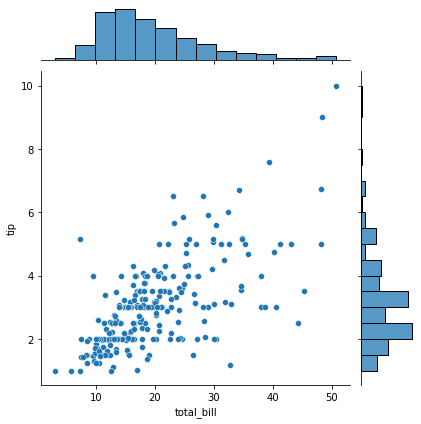

In [7]:
sns.jointplot(x="total_bill",y="tip", data=tips, kind="scatter")

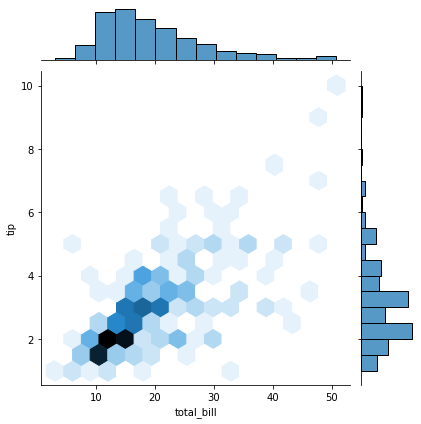

In [8]:
sns.jointplot(x="total_bill",y="tip", data=tips, kind="hex")

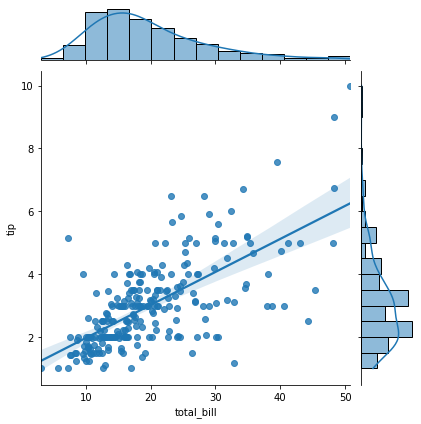

In [9]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

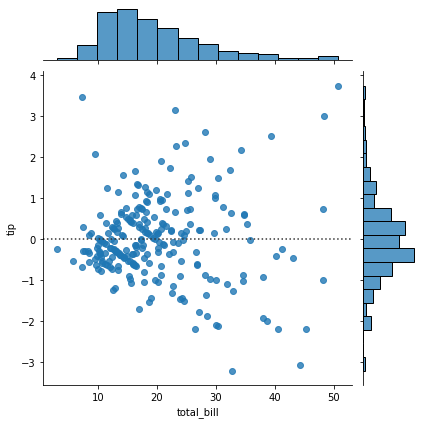

In [10]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="resid")

## Pair Plot
**pairplot()**, tüm veri çerçevesi boyunca, **sayısal sütunlar için** çift yönlü ilişkiler çizer.

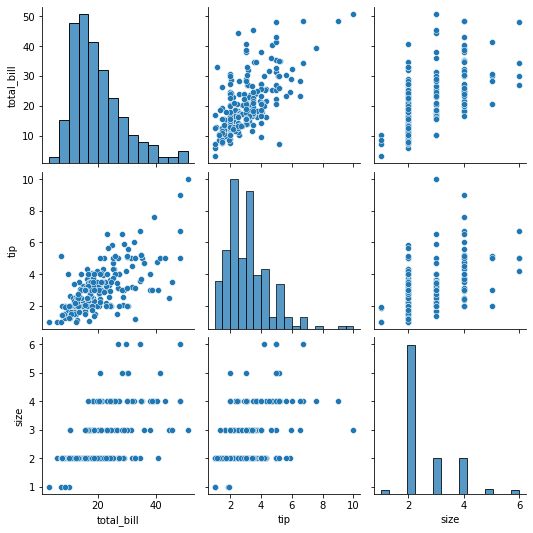

In [11]:
sns.pairplot(tips)

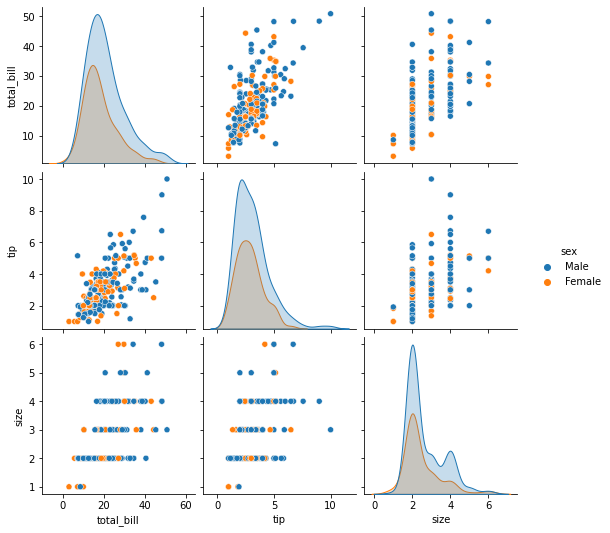

In [12]:
sns.pairplot(data=tips, hue="sex")

## Rug Plot
**rugplot()**, sadece **tek değişkenli** bir dağılım üzerindeki **her nokta** için çizgi çizer. Bir KDE çiziminin yapı taşıdır:

<AxesSubplot:xlabel='tip'>

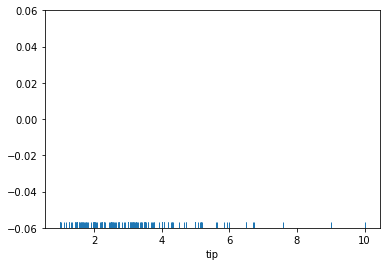

In [13]:
sns.rugplot(tips["tip"])

## Kde Plot
**kdeplot()**, Çekirdek Yoğunluk Tahmini grafikleridir. Bu KDE grafikleri, her gözlemin bu değere ortalanmış bir Gauss (Normal) dağılımla değiştirilmesini sağlar. 

<AxesSubplot:xlabel='tip', ylabel='Density'>

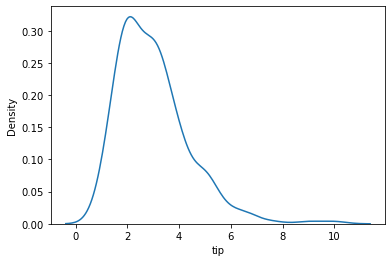

In [14]:
sns.kdeplot(tips["tip"])

## Kategorik Çizimler
Kategorik çizimleri üç ana başlık altında toplayabiliriz.
1. swarmplot() ve stripplot()
2. boxplot() ve violinplot()
3. barplot() ve pointplot()


## Strip Plot
Kategorik bir değişkenin her bir seviyede bazı niceliksel değişkenlerin değerlerini göstermenin basit bir yolu, dağılım çizimini değişkenlerden birinin kategorik olduğu duruma genelleyen stripplot() fonksiyonunu kullanmaktır.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

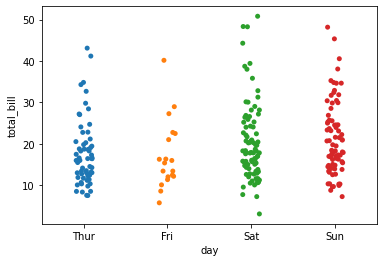

In [15]:
sns.stripplot(x="day",y="total_bill",data=tips)

* Dağılım çizimine baktığımızda detayları görmemiz zor duruyor. Buna bir çözüm olarak kategorik eksen boyunca rastgele ‘jitter’ kullanmaktır.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

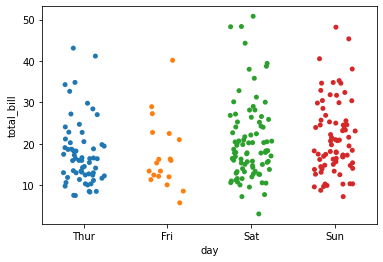

In [16]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=0.25)

## Swarm Plot
Farklı bir yaklaşım olarak kategorik eksendeki **her dağılma noktasını, noktaların çakışmasını önleyen** bir algoritmayla konumlandıran swarmplot() fonksiyonunu kullanmak olacaktır.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

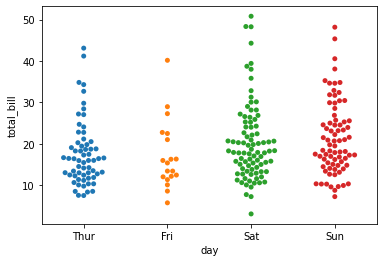

In [17]:
sns.swarmplot(x="day",y="total_bill", data=tips)

Ayrıca, renk parametresi ile iç içe geçmiş kategorik bir değişken daha eklemek mümkündür. hue ile kategorik bir değişken olarak cinsiyete bağlı olarak dağılımı ikiye ayırabiliriz

<AxesSubplot:xlabel='day', ylabel='total_bill'>

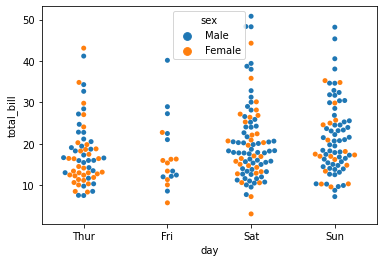

In [18]:
sns.swarmplot(x="day",y="total_bill", hue="sex", data=tips)

Genel olarak, Seaborn kategorik çizim fonksiyonları, verilerin kategorilerin sırasını çıkarmaya çalışmaktadır. Verilerinizde pandas kategorik veri türü varsa, kategorilerin varsayılan sırası burada ayarlanabilir. Diğer veri türlerinde, String olarak yazılan kategoriler DataFrame’de göründükleri sırayla çizilir, ancak sayısal  numaralar şeklinde görünen kategoriler halinde sıralanır, yani:

<AxesSubplot:xlabel='total_bill', ylabel='day'>

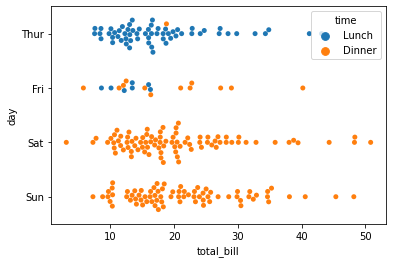

In [27]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips)

## Box Plot
Bu tür bir grafik, dağıtımın çeyrek değerlerini aşırı değerler ile birlikte göstermektedir. “whiskers”, alt ve üst çeyreğin 1.5 IQR’sinde kalan noktalara kadar uzanır ve daha sonra bu aralığın dışına çıkan gözlemler bağımsız olarak görüntülenir. Daha da önemlisi, bu, kutu çizimindeki her değerin verideki gerçek gözlemlere karşılık geldiği anlamına gelir:

<AxesSubplot:xlabel='day', ylabel='total_bill'>

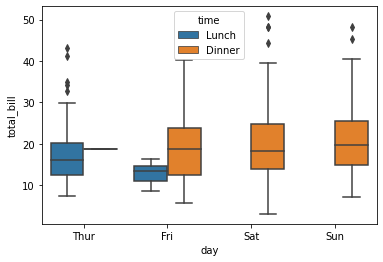

In [29]:
sns.boxplot(x="day",y="total_bill",hue="time",data=tips)

## Violin Plot
Farklı bir yaklaşım olarak violinplot() kullanılabilir:

<AxesSubplot:xlabel='total_bill', ylabel='day'>

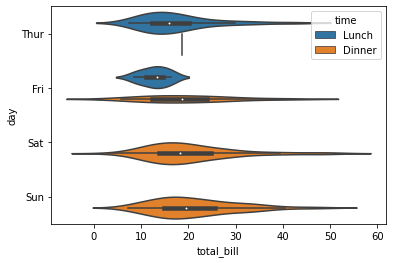

In [33]:
sns.violinplot(x="total_bill", y="day", hue="time",data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

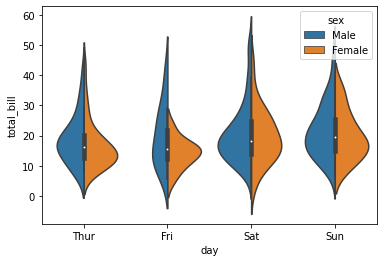

In [41]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)

## Bar Plot
Seaborn’da, barplot() fonksiyonu tam bir veri kümesi üzerinde çalışır ve varsayılan olarak ortalamayı kullanarak keyfi bir tahmini gösterir. Her bir kategoride birden çok gözlem varsa, tahmin etrafında bir güven aralığı hesaplamak için önyüklemeyi de kullanır ve hata çubuklarını kullanarak çizer:

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

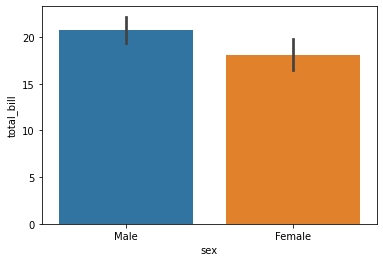

In [42]:
sns.barplot(x="sex", y="total_bill", data=tips)

Boxplot için özel bir durum, ikinci bir değişkene ilişkin bir istatistik hesaplamak yerine her kategoride gözlem sayısını göstermek istediğiniz zaman olur. Bu, niceliksel olmayan, kategorik bir histograma benzer. Seaborn’da, **countplot()** fonksiyonu ile bunu yapmak kolaydır:

<AxesSubplot:xlabel='smoker', ylabel='count'>

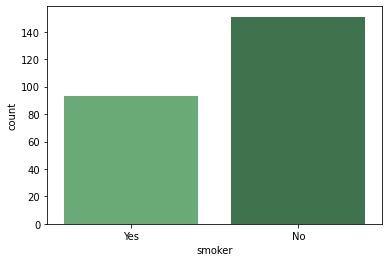

In [43]:
sns.countplot(x="smoker", data=tips, palette="Greens_d")

Hem barplot() hem de countplot(), her bir fonksiyonun ayrıntılı belgelerinde gösterilen diğerleriyle birlikte çağrılabilir:

<AxesSubplot:xlabel='count', ylabel='smoker'>

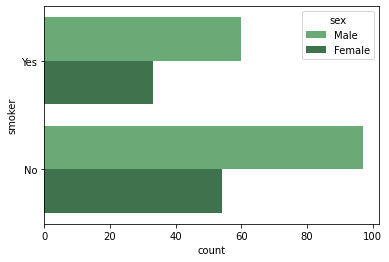

In [44]:
sns.countplot(y="smoker", hue="sex", data=tips, palette="Greens_d")

## Point Plot
Aynı bilgiyi görselleştirmek için alternatif bir stil olaral pointplot() fonksiyonu kullanılabilir. Bu fonksiyon ayrıca, tahmin değerini diğer eksendeki yükseklik ile kodlar; tam bir çubuk göstermek yerine sadece nokta tahminini ve güven aralığını çizer. Ayrıca, pointplot, aynı renk kategorisindeki noktaları birbirine bağlar. Bu, ana ilişkinin ikinci bir değişkenin bir fonksiyonu olarak nasıl bir değişim gösterdiğini kolayca görmenizi sağlar

<AxesSubplot:xlabel='time', ylabel='total_bill'>

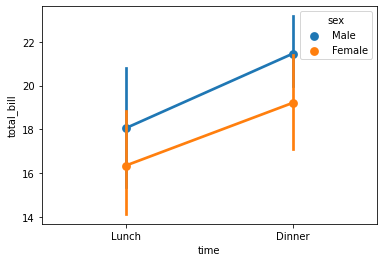

In [55]:
sns.pointplot(x="time", y="total_bill", hue="sex", data=tips)

## Catplot Plot
Catplot, çeşitli görsel temsillerden birini kullanarak bir sayısal ve bir veya daha fazla kategorik değişken arasındaki ilişkiyi göstermek için kullanışlıdır.

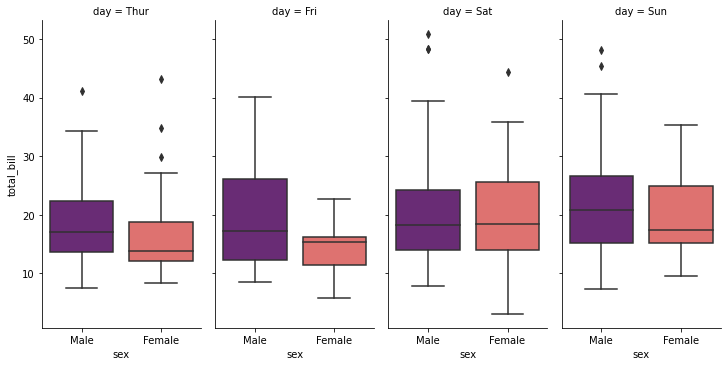

In [64]:
sns.catplot(x='sex',y='total_bill', col="day", aspect=.5,data=tips,kind='box',palette='magma')

## Matris Çizimleri
Matris çizimleri, veriyi renk kodlu matrisler olarak çizmenize izin verir ve ayrıca veri içindeki kümeleri göstermek için kullanılabilir.**corr() fonksiyonu sayısal değerler arasındaki korelasyonu gösterir.**

In [68]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


## Heat Map

<AxesSubplot:>

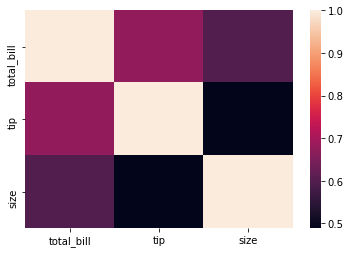

In [69]:
sns.heatmap(tips.corr())

<AxesSubplot:>

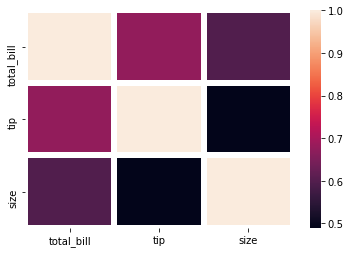

In [72]:
sns.heatmap(tips.corr(),linecolor='white',linewidths=5)

## Cluster Map

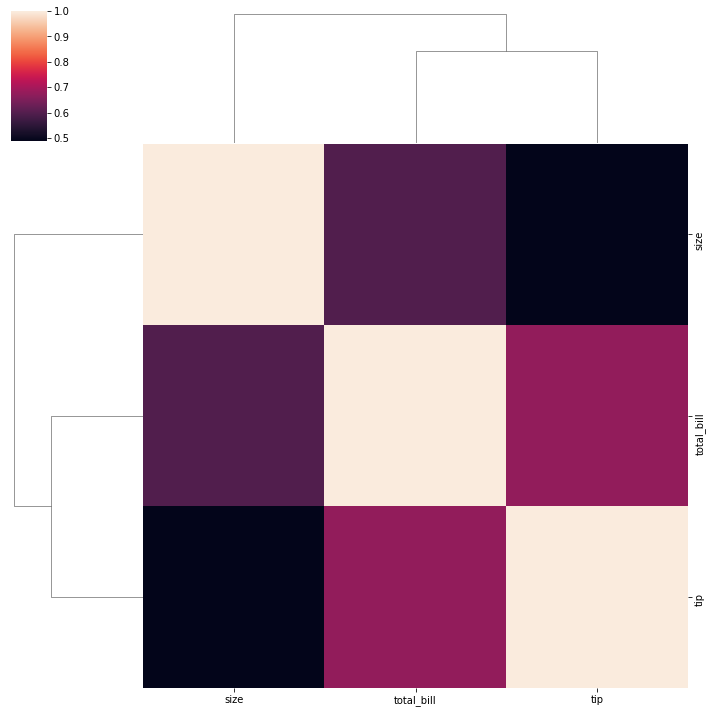

In [73]:
sns.clustermap(tips.corr())

## Regresyon Çizimleri

## LmPlot

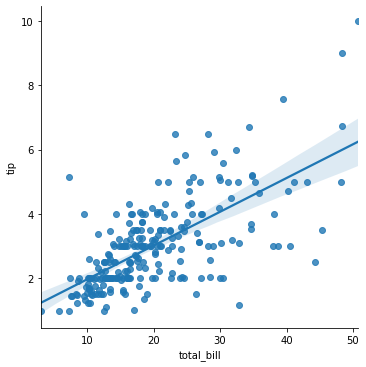

In [74]:
sns.lmplot(x='total_bill',y='tip',data=tips)